<a href="https://colab.research.google.com/github/MrBasM/TensorFlow-for-Deep-Learning-Bootcamp/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural network for classification problem

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


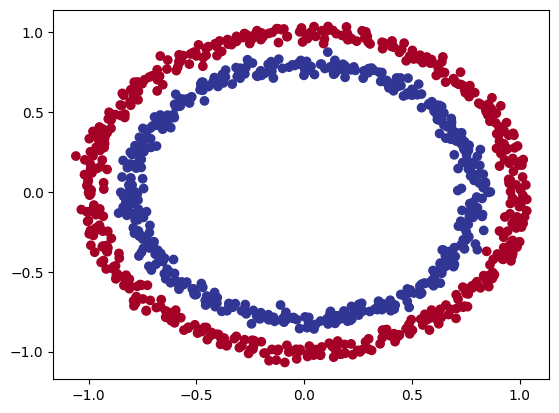

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

🛠️ **Exercise:** play around on [playground.tensorflow.org](https://playground.tensorflow.org) by building online models.

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate teh model
5. Tweak
6. Evaluate...

In [10]:
# Import tensorflow
import tensorflow as tf
tf.__version__

'2.18.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using teh Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5071 - loss: 5.7427
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4826 - loss: 4.7770
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4819 - loss: 4.5978
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4962 - loss: 4.0350
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5057 - loss: 1.9505


In [12]:
# Let's try improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as it's guessing.

So let's step things up a notch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4589 - loss: 0.6930  


[0.6933146715164185, 0.4580000042915344]

In [15]:
circles["label"].value_counts()

,count
label,
1,500
0,500


## Improving our model

Let's see how we can improve our model

1. Create a model - we might add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 0.6917  


[0.6936383843421936, 0.4950000047683716]

To visualize our model predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)




In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decission boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() +0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


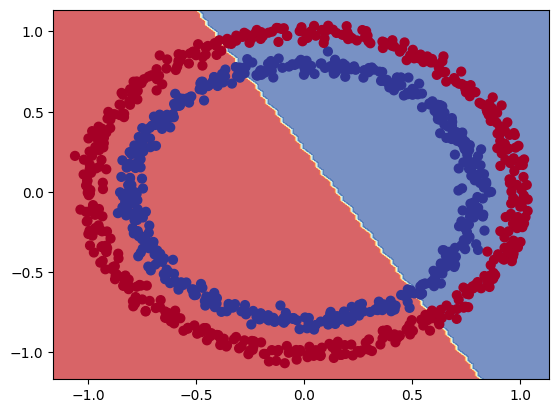

In [20]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [21]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split the data in training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)


We compiled our model for a binary classification.
To test it for a regression problem we have to make some adjustments

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 436.3714 - mae: 436.3714
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 324.4941 - mae: 324.4941  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 268.2889 - mae: 268.2889 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 259.1483 - mae: 259.1483 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 265.0030 - mae: 265.0030 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 264.5604 - mae: 264.5604 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 259.3244 - mae: 259.3244 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 256.9844 - mae: 256.9844 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 257.9212 - mae: 257.9212 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 258.7337 - mae: 258.7337 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 258.1404 - mae: 258.1404 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 257.4189 - mae: 257.4189 
Epoch 13/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


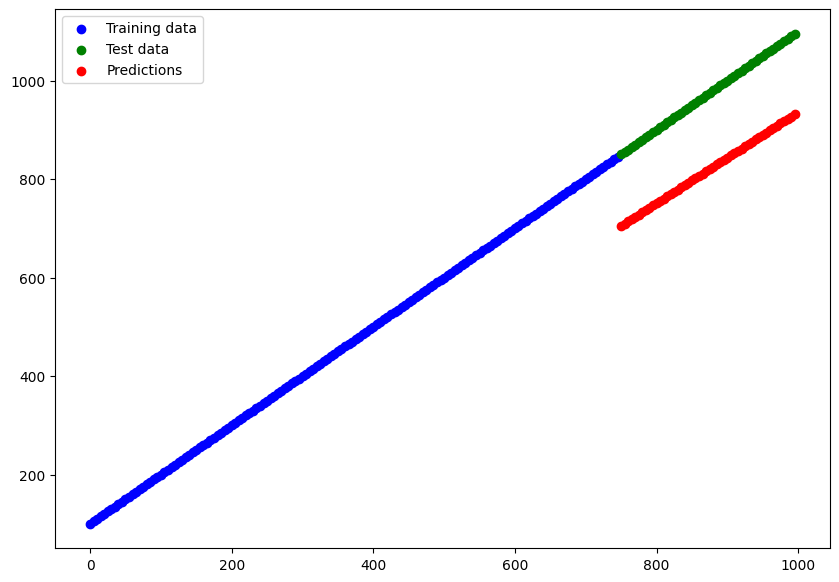

In [23]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions againts our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label= "Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4825 - loss: 4.5045
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4585 - loss: 4.3768
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4205 - loss: 4.2600 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4086 - loss: 4.1537
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3936 - loss: 3.9555
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3916 - loss: 3.8995
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3868 - loss: 3.7901
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3941 - loss: 3.6682
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3977 - loss: 3.5057
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3972 - loss: 3.3650
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3991 - loss: 3.3270
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

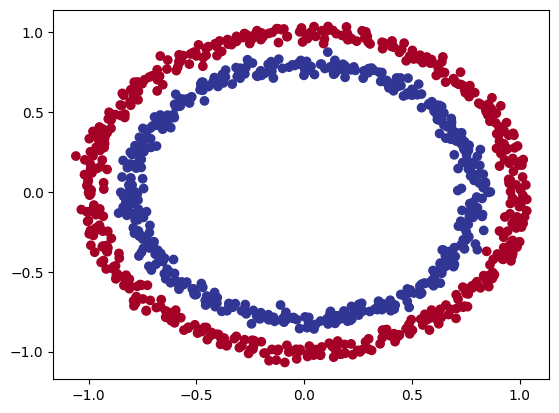

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


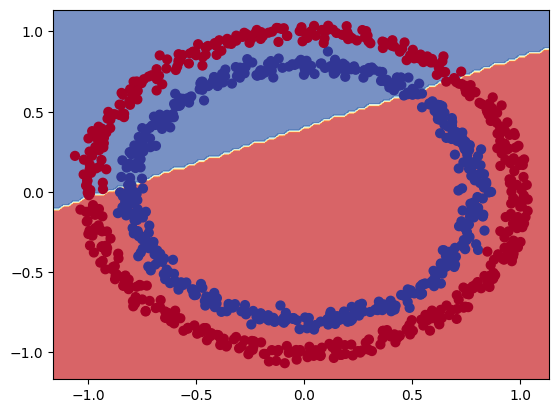

In [26]:
# Check the decission boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4775 - loss: 4.4469
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4689 - loss: 4.4198
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4632 - loss: 4.3898
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4616 - loss: 4.3817
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4604 - loss: 4.3498
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4537 - loss: 4.3022
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4529 - loss: 4.2995
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4514 - loss: 4.2937
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4378 - loss: 4.2571
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4349 - loss: 4.2531
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4337 - loss: 4.2513
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [28]:
# Time to replicate the multi-layer neural network from the playground

# Set seed
tf.random.set_seed(42)

# 1. create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# 2. compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit teh model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4830 - loss: 4.1097
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.7103
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.0933
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 1.0236
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.9767
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.9392
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4828 - loss: 0.9086
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4690 - loss: 0.8832
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4423 - loss: 0.8619
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4132 - loss: 0.8440
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4096 - loss: 0.8287
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


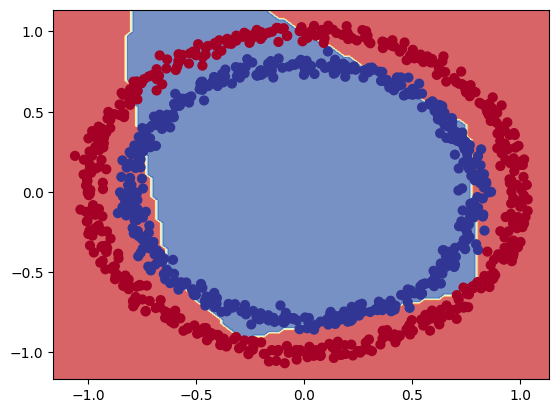

In [29]:
plot_decision_boundary(model_6, X, y)

In [30]:
# set random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. compile model
model_7.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_7.fit(X, y, epochs=250, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


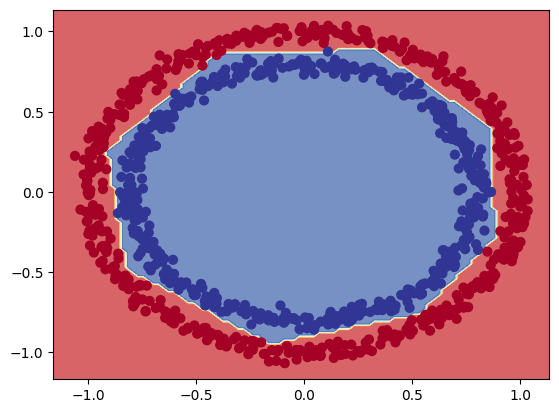

In [31]:
plot_decision_boundary(model_7, X, y)

Now we've discussed the concept of linear and non-linear fucntions (or lines), let's see them in action

In [32]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

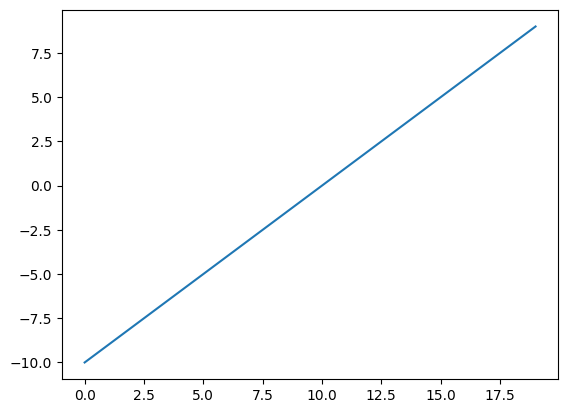

In [33]:
# Visualize our toy tensor
plt.plot(A);

In [34]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [35]:
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

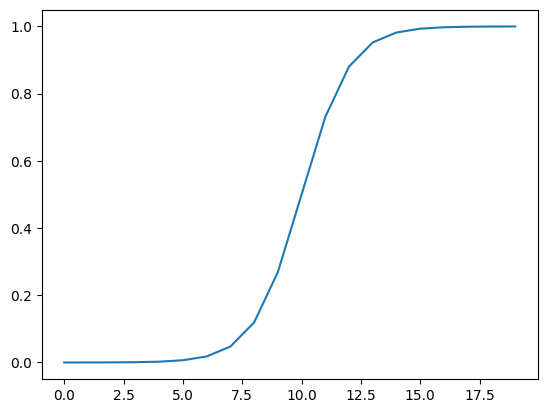

In [36]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(20,), dtype=float32)


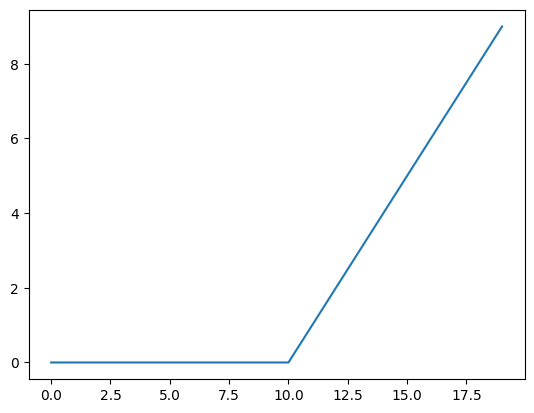

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

print(relu(A))
plt.plot(relu(A));

In [38]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

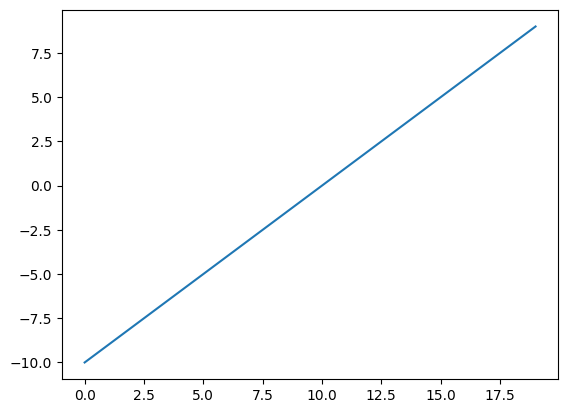

In [39]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [40]:
# Does it even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

Let's create a training and test set

In [41]:
# Split into train and test sets

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [42]:
# Let's use the splitted data

# Set random seed
tf.random.set_seed(42)

# 1 create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5300 - loss: 0.6864
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5699 - loss: 0.6781
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5772 - loss: 0.6715
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5829 - loss: 0.6637
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5894 - loss: 0.6533
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6146 - loss: 0.6389
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6968 - loss: 0.6167
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7370 - loss: 0.5851
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7483 - loss: 0.5571
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7683 - loss: 0.5263
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7914 - loss: 0.4990
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7989 - lo

In [43]:
# 4. Evaluate the mode on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9963 - loss: 0.0482  


[0.04513076692819595, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


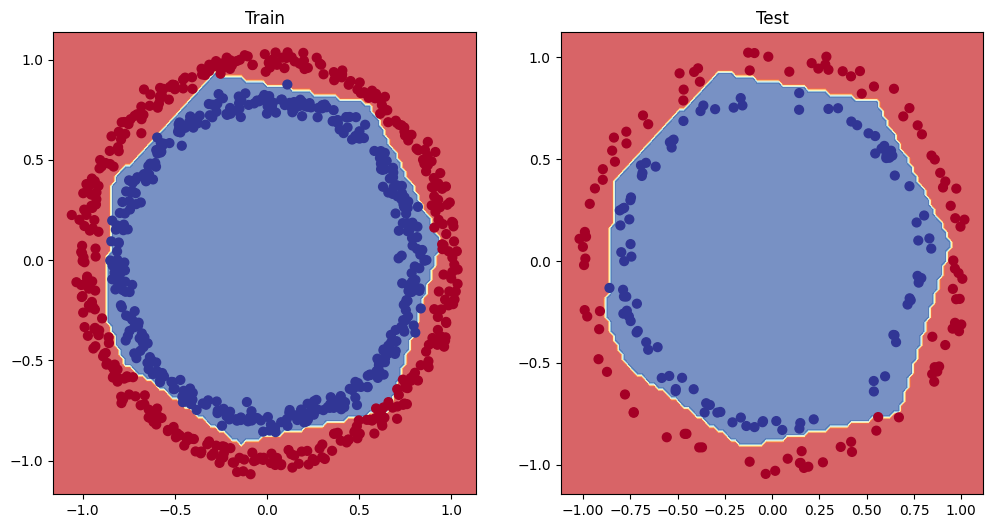

In [44]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [45]:
history.history

{'accuracy': [0.543749988079071,
  0.5912500023841858,
  0.5987499952316284,
  0.6075000166893005,
  0.6225000023841858,
  0.6725000143051147,
  0.7425000071525574,
  0.7649999856948853,
  0.7762500047683716,
  0.7862499952316284,
  0.8062499761581421,
  0.8237500190734863,
  0.8675000071525574,
  0.9474999904632568,
  0.9725000262260437,
  0.9762499928474426,
  0.981249988079071,
  0.981249988079071,
  0.9825000166893005,
  0.9825000166893005,
  0.9837499856948853,
  0.9837499856948853,
  0.9850000143051147,
  0.987500011920929,
  0.9887499809265137],
 'loss': [0.6827661991119385,
  0.6730955243110657,
  0.6651936173439026,
  0.655415415763855,
  0.642881453037262,
  0.6244524121284485,
  0.5984959006309509,
  0.5655328631401062,
  0.5330756306648254,
  0.502490222454071,
  0.47381630539894104,
  0.43895816802978516,
  0.36876487731933594,
  0.27605217695236206,
  0.2194376140832901,
  0.18095627427101135,
  0.15188787877559662,
  0.13101454079151154,
  0.11485475301742554,
  0.102166

In [46]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.54375,0.682766
1,0.59125,0.673096
2,0.59875,0.665194
3,0.60750,0.655415
4,0.62250,0.642881
5,0.67250,0.624452
6,0.74250,0.598496
7,0.76500,0.565533
8,0.77625,0.533076
9,0.78625,0.502490


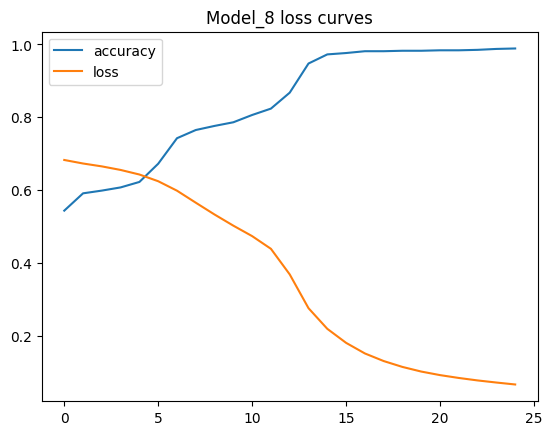

In [47]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑 **Note:** For many problems, the loss function going down means the model is improving (teh predictions it's making are getting ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (teh learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionallity, you can add to your *while* its training.
* Another model
* A modified loss curves plot

In [48]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5016 - loss: 0.6916 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5016 - loss: 0.6908 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5016 - loss: 0.6900 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5016 - loss: 0.6891 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5016 - loss: 0.6883 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5029 - loss: 0.6875 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5097 - loss: 0.6866 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5091 - loss: 0.6858 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5040 - loss: 0.6850 - learni

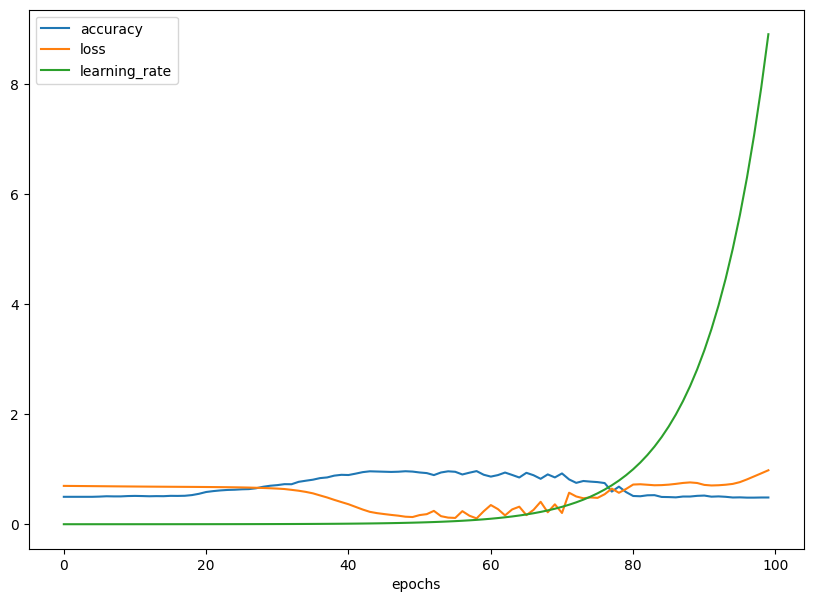

In [49]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

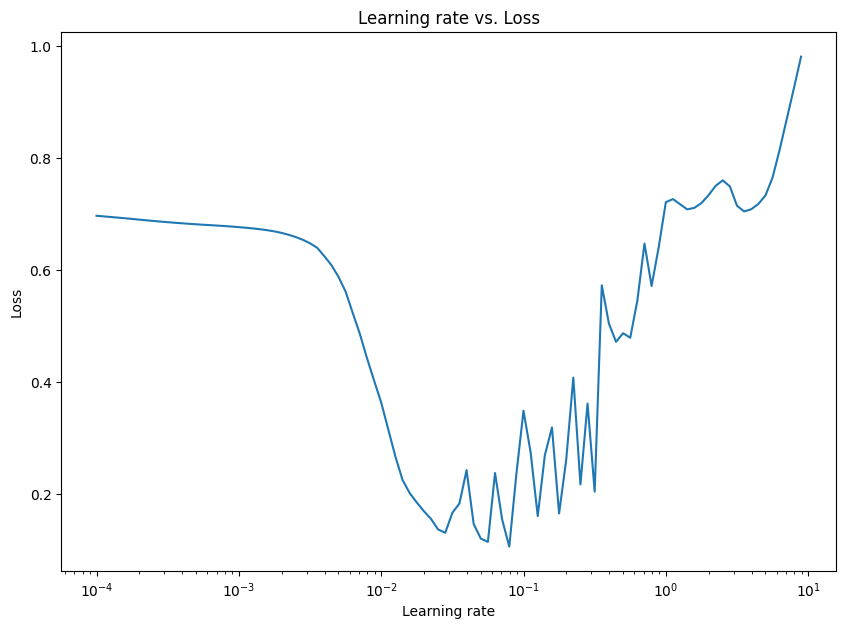

In [50]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [51]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [55]:
# Previous used learning rate
10**-2

0.01

In [74]:
# Let's try using a higher *ideal* learning rate

# Set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model with ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5236 - loss: 0.6903
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5926 - loss: 0.6762 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6478 - loss: 0.6533 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.5889 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8851 - loss: 0.4787 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9361 - loss: 0.3455 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.2476 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.1762 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.1321 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.1073 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0927 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [57]:
# evaluate model 10
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9981 - loss: 0.0556  


[0.056776389479637146, 0.9950000047683716]

In [58]:
# evaluate model 8
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9963 - loss: 0.0482 


[0.04513076692819595, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


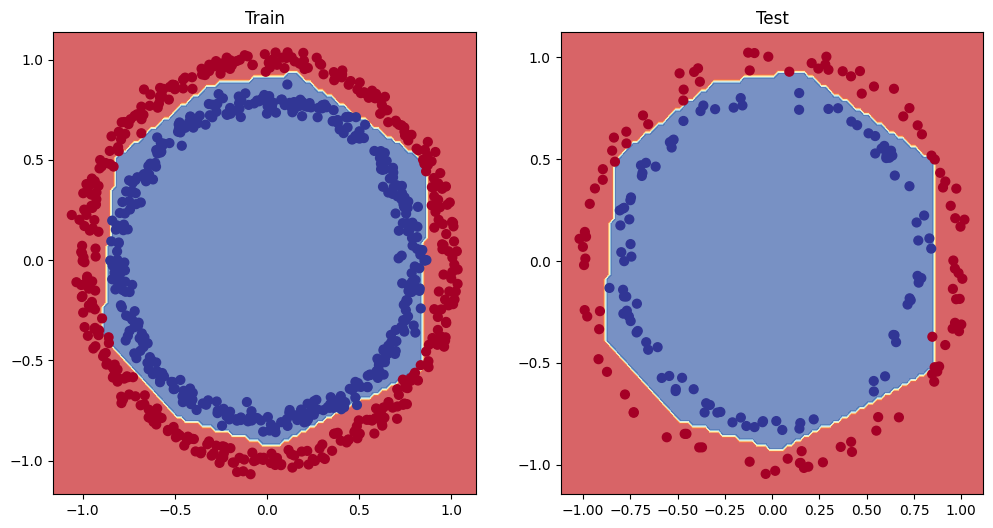

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from SciKit-Learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [75]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9842 - loss: 0.0498  
Model loss on the test set: 0.04034319892525673
Model accuracy on the test set: 99.00%


In [84]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10(X_test)

# create confusion matrix
# confusion_matrix(y_test, y_preds) # error ->  Classification metrics can't handle a mix of binary and continuous targets; the y_preds is in probability output format... we need to convert it

In [83]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[0.99971074],
        [0.99973345],
        [0.99850124],
        [0.998286  ],
        [0.02516592],
        [0.01358429],
        [0.98814076],
        [0.01332002],
        [0.989801  ],
        [0.03143707]], dtype=float32)>)

In [89]:
# Convert prediciton probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [92]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

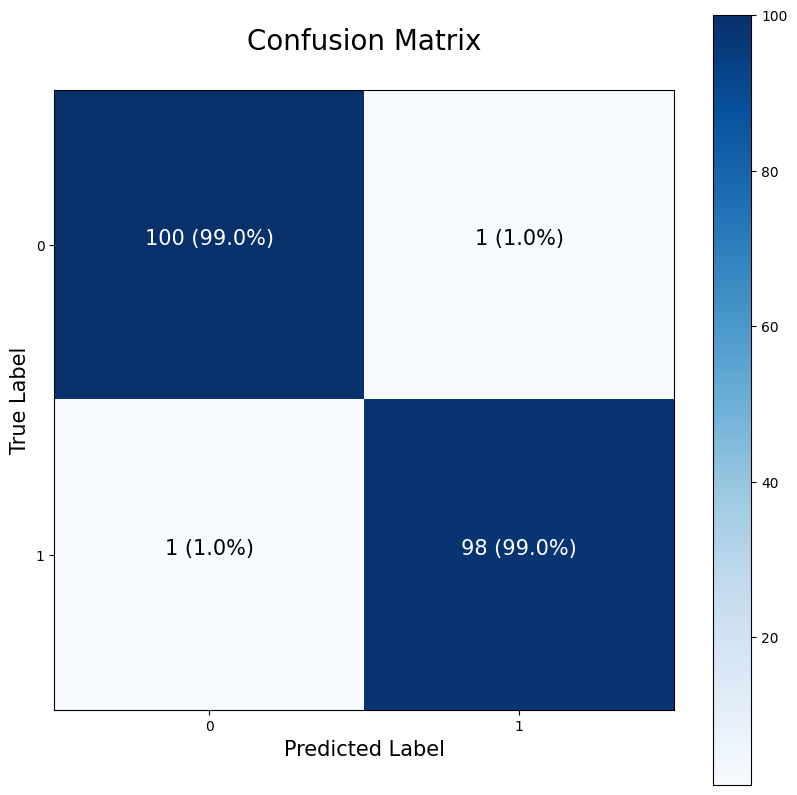

In [104]:
# Prettify confusion matrix

import itertools

figsize = (10,10)

# Create the matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize matrix
n_classes = cm.shape[0]

# Prettify it
fig, ax = plt.subplots(figsize=figsize)
# create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels=np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix\n",
       ylabel="True Label",
       xlabel="Predicted Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15
           )

In [96]:
cm.shape[0]

2